In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train = pd.read_csv(r'C:\Users\Rishabh\Downloads\titanic (1)\train.csv')
test = pd.read_csv(r"C:\Users\Rishabh\Downloads\titanic (1)\test.csv")
train.set_index(['PassengerId'],inplace=True)
test.set_index(['PassengerId'],inplace=True)
train.head(10)



,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


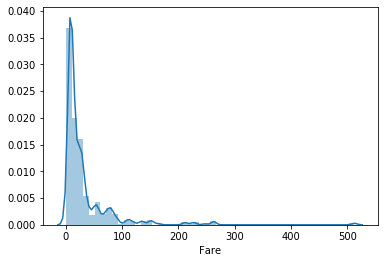

In [3]:
sns.distplot(train['Fare'])
plt.show()


In [4]:
train["Fare"] = train["Fare"].fillna(train["Fare"].median())
train.loc[train["Fare"]<=5,"Fare"]=0
train.loc[(train['Fare'] > 5) & (train['Fare'] <= 10),"Fare"]=1
train.loc[(train['Fare'] > 10) & (train['Fare'] <= 20),"Fare"]=2
train.loc[(train['Fare'] > 20) & (train['Fare'] <= 50),"Fare"]=3
train.loc[(train['Fare'] > 50) & (train['Fare'] <= 100),"Fare"]=4
train.loc[(train['Fare'] > 100) & (train['Fare'] <= 200),"Fare"]=5
train.loc[200<train["Fare"],"Fare"]=10


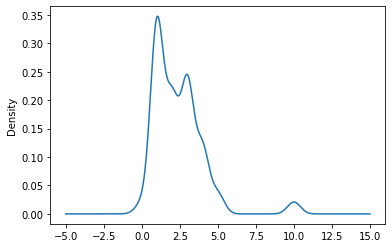

In [5]:
train.Fare.plot(kind="kde")
plt.show()

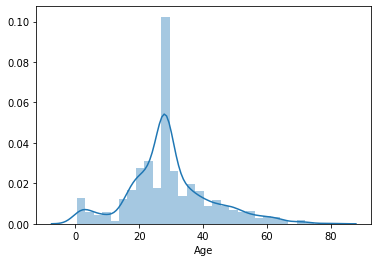

In [6]:
train["Age"] = train["Age"].fillna(train["Age"].median())
sns.distplot(train['Age'])

plt.show()

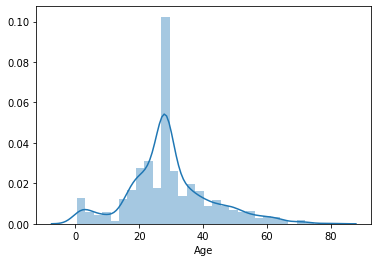

In [7]:
train["Age"] = train["Age"].fillna(train["Age"].median())
sns.distplot(train['Age'])

plt.show()

In [8]:
train.loc[train["Age"]<=5,"Age"]=0
train.loc[(train['Age'] > 5) & (train['Age'] <= 10),"Age"]=1
train.loc[(train['Age'] > 10) & (train['Age'] <= 20),"Age"]=2
train.loc[(train['Age'] > 20) & (train['Age'] <= 30),"Age"]=3
train.loc[(train['Age'] > 30) & (train['Age'] <= 40),"Age"]=4
train.loc[(train['Age'] > 40) & (train['Age'] <= 50),"Age"]=5
train.loc[(train['Age'] > 50) & (train['Age'] <= 60),"Age"]=6
train.loc[(train['Age'] > 60) & (train['Age'] <= 70),"Age"]=7
train.loc[(train['Age'] > 70) & (train['Age'] <= 80),"Age"]=8
train.loc[train["Age"]>80,"Age"]=10


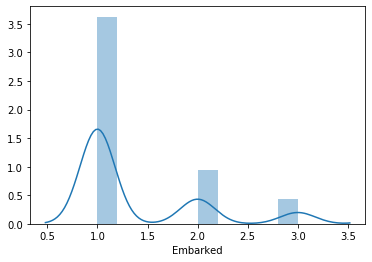

In [9]:
train["Embarked"] = train["Embarked"].fillna('S')
train.loc[train["Embarked"]=='S',"Embarked"]=1
train.loc[train["Embarked"]=='C',"Embarked"]=2
train.loc[train["Embarked"]=='Q',"Embarked"]=3


sns.distplot(train['Embarked'])

plt.show()

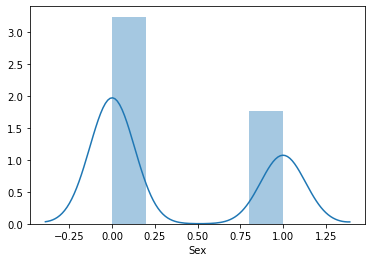

In [10]:
train.loc[train["Sex"]=="male","Sex"]=0
train.loc[train["Sex"]=="female","Sex"]=1

sns.distplot(train['Sex'])

plt.show()

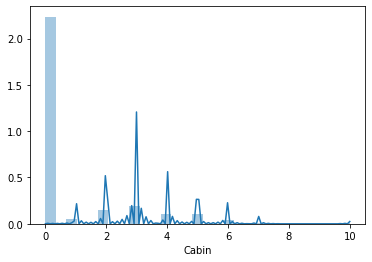

In [11]:
train["Cabin"] = train["Cabin"].fillna('0')
train['Cabin'] = train['Cabin'].str.extract(pat = '([ABCDEFGT0])')
train.loc[train["Cabin"]=='A',"Cabin"]=1
train.loc[train["Cabin"]=='B',"Cabin"]=2
train.loc[train["Cabin"]=='C',"Cabin"]=3
train.loc[train["Cabin"]=='D',"Cabin"]=4
train.loc[train["Cabin"]=='E',"Cabin"]=5
train.loc[train["Cabin"]=='F',"Cabin"]=6
train.loc[train["Cabin"]=='G',"Cabin"]=7
train.loc[train["Cabin"]=='T',"Cabin"]=10
train.loc[train["Cabin"]=='0',"Cabin"]=0

sns.distplot(train['Cabin'])

plt.show()